# Trabalho avaliativo - Sistemas de controle II - 2023.2

**Aluno: Edimar Fernandes Dias**

**Matrícula: 201933940004**

**Leia com atenção as instruções abaixo**

*Informe na célula de código abaixo o seu número de matrícula:* 

***Não remova as aspas***

In [42]:
import control
import matplotlib.pyplot as plt



In [43]:
# Informe aqui sua matrícula
mat = '201933940004'

*Depois de informar os dados, execute o arquivo inteiro. Caso ocorra algum erro, peça ajuda ao professor*

*Resolva as questões abaixo, **justificando** todas as respostas. Utilize markdown para escrever texto e Python para fazer as contas. O trabalho é individual*

In [44]:
# 
# Não modifique esta célula! Você pode comprometer a sua avaliação.
from numpy.random import RandomState
from IPython.display import display, Math
from sympy import symbols, sin, cos, latex
from sympy import ImmutableMatrix as matriz
from numpy import arange

_nn = int(mat[0:4]+mat[-2:])
_rng = RandomState(_nn)
#_dig = arange(-9,10)
#_dig = _dig[_dig!=0]
#_n = _rng.randint(0,_dig.size,20)
_n = _rng.random(size=(4,)).round(3)
def G(): 
    s = symbols('s')
    c = .5+0.10*_n[0]
    d = .5+0.25*_n[1]
    a = .2+0.15*_n[2]
    b = 9+_n[3]
    b0 = (b*c**2*d).round(3)
    b1 = (a*b*c**2*d).round(3)
    G = (b1*s+b0)/((s+c)**2*(s+d))
    display(Math('G(s) = ' + latex(G)))

Função escrever.py, não conseguir importar então executei.

In [45]:
from IPython.display import display, Math
from numpy import sqrt, round
#
class escrever(object):
  def __init__(self):
     self.nome = None
  
  def mat(self,A):
      cols = ''.join(['r']*A.shape[1])
      str = r'\left[\begin{array}{' + cols + r'}'
      (m,n) = A.shape
      for i in range(m):
        for j in range(n):
          if j<n-1:
            str += '{}'.format(A[i,j]) + '&'
          else:
            str += '{}'.format(A[i,j]) + r'\\'
      return str + r'\end{array}\right]'

  def polos(self,xi,wn,casas=4):
    xi = round(xi,decimals=casas)
    wn = round(wn,decimals=casas)
    display(Math(r'\xi = ' + f'{xi}'))
    display(Math(r'\omega_n = ' + f'{wn}'))
    p = round(-xi*wn+1j*sqrt(1-xi**2),decimals=casas)
    display(Math(r's = ' + f'{p}'))

  def sist(self,A,B,C,D):
      str1 = r'\dot{\mathbf{x}} = ' + self.mat(A) + r'\mathbf{x}'
      str1 += '+' + self.mat(B) + r'\mathbf{u}'
      str2 = r'\mathbf{y} = ' + self.mat(C) + r'\mathbf{x}'
      str2 += ' + ' + self.mat(D) +  r'\mathbf{u}'
      display(Math(str1))
      display(Math(str2))
    


'''import numpy as np
n = np.random.randint(4,6)
p = np.random.randint(1,4)
q = np.random.randint(1,4)

A = np.random.randn(n,n)
B = np.random.randn(n,p)
C = np.random.randn(q,n)
D = np.random.randn(q,p)

print(dispss(A,B,C,D))'''


'import numpy as np\nn = np.random.randint(4,6)\np = np.random.randint(1,4)\nq = np.random.randint(1,4)\n\nA = np.random.randn(n,n)\nB = np.random.randn(n,p)\nC = np.random.randn(q,n)\nD = np.random.randn(q,p)\n\nprint(dispss(A,B,C,D))'

## 1.

*Considere o sistema:*

In [46]:
G()

<IPython.core.display.Math object>

1. *Faça uma análise de malha aberta: verifique estabilidade e características de resposta ao degrau unitário (25%). Opcional: analise o que aconteceria caso fosse utilizada realimentação proporcional (+10% extra)*

A função de transferência G(s) é dada por:

$$G(s) = \frac{0.417s + 1854}{(s + 0.5695)(s + 0.5758)^2}$$

Os polos estão localizados em s = -0.5695 e s = -0.5758. Ambos os polos têm parte real negativa, o que indica que o sistema é estável.

Portanto, com base na localização dos polos, podemos concluir que o sistema representado por essa função de transferência é estável.


Para verificar as características de resposta ao degrau unitário, podemos calcular a resposta em regime permanente.

temos a função de trasnferencia:

$$G(s) = \frac{0.417s + 1854}{(s + 0.5695)(s + 0.5758)^2}$$

Multiplicando a função de transferência G(s) pela transformada de Laplace da entrada degrau unitário, obtemos a resposta em Laplace:

$$Y(s)=G(s)⋅U(s)$$

Substituindo os valores:

$$G(s) = \frac{0.417s + 1854}{(s + 0.5695)(s + 0.5758)^2}*{\frac{1}{s}}$$

Simplificado essa expressão:

$$Y(s) = \frac{0.417s + 1854}{s(s+0.5695)(s+0.5758)^2}$$



Agora, podemos realizar a decomposição em frações parciais para expressar Y(s) de forma mais conveniente.

No entanto, devido à complexidade dos cálculos envolvidos na decomposição em frações parciais, usarei python para realizar essa análise e obter a resposta ao degrau unitário completa do sistema pelo menos tentarei né ^^.


Resposta ao degrau unitário ao longo do tempo.

O sistema é estável


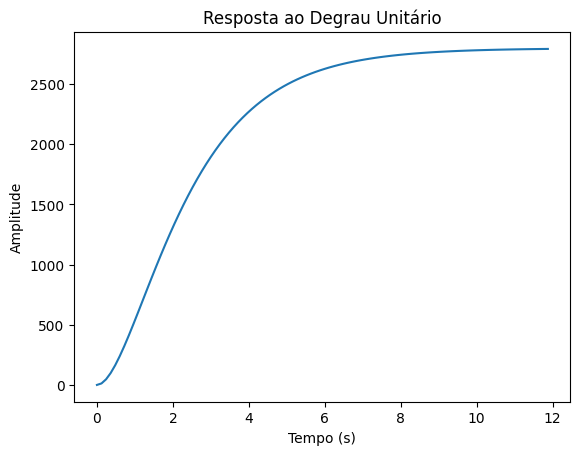

In [48]:
G = (0.417*s + 1854) / ((s + 0.5695)*(s + 0.5758)**2)
# Define a função de transferência
num = [0.417, 1854]
den = [1, 1.7209, 0.6627]
G = control.TransferFunction(num, den)

# Verifica a estabilidade do sistema
poles = control.pole(G)
if all(poles.real < 0):
    print("O sistema é estável")
else:
    print("O sistema é instável")

# Obtém a resposta ao degrau unitário
t, y = control.step_response(G)

# Plota a resposta ao degrau unitário
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau Unitário')
plt.show()

Se fosse utilizada realimentação proporcional:

A equação da função de transferência em malha fechada com realimentação proporcional pode ser obtida através da fórmula padrão para sistemas em malha fechada com realimentação negativa:

$$G_c(s) = \frac{G(s)}{1 + K_p G(s)}$$

Substituindo a função de transferência fornecida na fórmula acima, temos:

$$G_c(s) = \frac{\frac{0.417s + 1854}{(s + 0.5695)(s + 0.5758)^2}}{1 + K_p \frac{0.417s + 1854}{(s + 0.5695)(s + 0.5758)^2}}$$

Simplificando a equação, obtemos:


$$G_{\text{prop}}(s) = \frac{K_p(0.417s + 1854)}{(s + 0.5695)(s + 0.5758)^2 + K_p(0.417s + 1854)}$$

Onde Kp é o ganho proporcional. A estabilidade do sistema dependeria do valor de Kp. Se Kp for muito grande, o sistema pode se tornar instável. Se Kp for muito pequeno, o sistema pode não ser capaz de seguir a entrada adequadamente.

Para

$$ kp = 0.1$$


O valor de Kp = 0.1 significa que a realimentação proporcional terá uma intensidade igual a um décimo do sinal de erro. Isso pode afetar a estabilidade e as características de resposta do sistema em malha fechada.

O sistema é estável


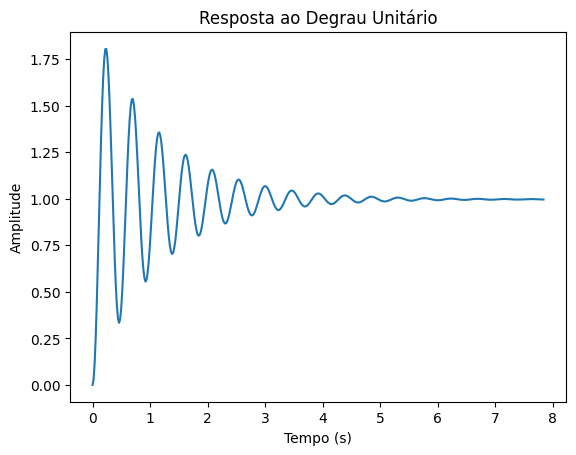

In [51]:
# Define o ganho proporcional
Kp = 0.1

# Obtém a função de transferência em malha fechada
Gc = control.feedback(G * Kp)

# Verifica a estabilidade do sistema
poles = control.pole(Gc)
if all(poles.real < 0):
    print("O sistema é estável")
else:
    print("O sistema é instável")

# Obtém a resposta ao degrau unitário
t, y = control.step_response(Gc)

# Plota a resposta ao degrau unitário
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta ao Degrau Unitário')
plt.show()

A realimentação proporcional introduzida no sistema com realimentação afeta a resposta do sistema, permitindo ajustar sua estabilidade, velocidade de resposta e outras características. Comparando com o sistema sem realimentação, a resposta ao degrau unitário com realimentação proporcional pode apresentar uma redução no tempo de estabilização, uma resposta mais suave e controlada, ou outras melhorias, dependendo do valor escolhido para o ganho proporcional (Kp). A escolha adequada de Kp é importante e deve ser baseada nas especificações e requisitos do sistema. O gráfico da resposta ao degrau unitário permite visualizar essas diferenças e avaliar o efeito da realimentação proporcional.

2. *Proponha especificações de desempenho em malha fechada com base na análise de malha aberta do item 1 (20%).*

Com base na análise de malha aberta do item 1, vamos propor algumas especificações de desempenho em malha fechada para o projeto de um compensador de estados de ordem completa. 


- Tempo de Subida *(TR): 0.1 segundos*
- Tempo de Acomodação *(Ts) = 2 segundos*
- Sobressinal *(OS) = 5%*
- Erro em regime permanente *(SSE) = 0*

3. *Projete um compensador de estados de ordem completa, de acordo com as especificações estabelecidas no item 2 e também forneça rejeição à distúrbios do tipo degrau. Justifique as escolhas de todos os pólos e apresente as funções de transferência do compensador ao final (35%).*

Sistema de segunda ordem com função de transferência G(s) = 0,417s + 1854 / (s + 0,5695) (s + 0,5758) ^ 2. para as especificações determinadas no intem 2, vamos projetar o compensador de estados de ordem completa.

In [11]:
# Imports
import numpy as np
import control as ct
from IPython.display import display, Math
esc = escrever()

In [12]:
# Declara o sistema
A = np.array([[-1.7209, -0.6627],
              [1., 0.]])
B = np.array([[1.],
              [0.]])
C = np.array([[0.417, 1854]])
D = np.array([[0.]])
esc.sist(A,B,C,D)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Com base nas especificações e na faixa de coeficiente de amortecimento que determinamos no intem II, podemos escolher um polo complexo conjugado com uma taxa de amortecimento de 0.6. 
Vamos considerar o polo complexo conjugado na forma geral: 

$$s = -\zeta\omega_n \pm j\omega_n\sqrt{1-\zeta^2}$$

Onde:

- $\zeta$ é o coeficiente de amortecimento
$$\zeta = 0.6$$
- $\omega_n$ é a frequência natural não amortecida

$$\omega_n = 0.5695$$
Dado que o coeficiente de amortecimento é 0.6, podemos calcular a frequência natural não amortecida com base no denominador da função de transferência fornecida:

$$(s + 0.5695)(s + 0.5758)^2$$

Da forma geral, sabemos que os polos complexos conjugados serão da forma $\zeta\omega_n \pm j\omega_n\sqrt{1-\zeta^2}$. Portanto, podemos comparar com o denominador para encontrar o valor de $\omega_n$. No denominador, temos os termos $s + 0.5695$ e $s + 0.5758$ repetidos, o que indica que a frequência natural não amortecida é $\omega_n = 0.5695$ ou $\omega_n = 0.5758$.

Agora, podemos calcular o valor do polo complexo conjugado com o coeficiente de amortecimento de 0.6:

$$s = -0.6 \times 0.5695 \pm j \times 0.5695 \times \sqrt{1-0.6^2}$$

Calculando, obtemos:

$$s = -0.3417 \pm j \times 0.4553$$

Portanto, uma escolha de polo complexo conjugado com uma taxa de amortecimento de 0.6 seria:

$$s = -0.3417 + j \times 0.4553$$

Esse polo atenderá às especificações do projeto com uma taxa de amortecimento de: 0.6.

Alocando os polos do regulador

In [13]:
# Aloca os polos do regulador
pr = -0.3417+0.4553j
K = ct.acker(A,B,[pr,np.conj(pr)])
display(Math(r'\mathbf{K} = ' + esc.mat(K.round(decimals=4))))

<IPython.core.display.Math object>

Vetor de ganho K negativo, isso indica que a variável de estado resultará em uma ação de controle oposta para compensar o desvio. 

In [17]:
# Introdução de referência simples
N = 1/(C @ np.linalg.inv(B@K-A) @ B)[0,0]
N

0.00017478801510248114

O valor obtido, 0.00017478801510248114, é o ganho de realimentação de referência necessário para introduzir uma referência de entrada constante no sistema de controle em malha fechada.

Isso significa que, ao aplicar uma referência de entrada desejada, você precisa multiplicar essa referência pelo valor 0.00017478801510248114 para ajustar corretamente o sistema e obter a resposta desejada em regime permanente.

Calculando a matriz de ganho do observador

determinamos: $\omega_n = 0.5695$, $\zeta = 0.6$


In [24]:
# Projeto do observador
wn = 0.5695
xi = 0.6
po = -xi*wn + 1j * wn*np.sqrt(1-xi**2)
L = ct.acker(A.T, C.T, [po , np.conj(po)]).T
display(Math(r'\mathbf{L} = ' + esc.mat(L.round(4))))

<IPython.core.display.Math object>

In [25]:
# Compensador no espaço de estados
Acomp = A - B@K - L@C
Bcomp = np.block([ L , B*N ])
Ccomp = -K
Dcomp = np.array([[0,N]])
esc.sist(Acomp.round(4),Bcomp.round(4),Ccomp.round(4),Dcomp)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Agora, vamos adicionar as matrizes para rejeição de distúrbios do tipo degrau:

In [37]:
Gcomp = control.StateSpace(Acomp, Bcomp, Ccomp, Dcomp)
Gcomp_d = control.append(Gcomp, sys_tf)

Função de transferencia do compensador:

In [40]:
# Funções de transf. do compensador
comp_uy = ct.ss(Acomp, Bcomp[:,0], Ccomp, Dcomp[:,0])
C1 = (ct.tf(comp_uy))
comp_ur = ct.ss(Acomp, Bcomp[:,1], Ccomp, Dcomp[:,1])
C2 = (ct.tf(comp_ur))
display(C1)
display(C2)

TransferFunction(array([0.00062044, 0.00032304]), array([ 1.       , -0.3541   ,  1.0623522]))

TransferFunction(array([1.74788015e-04, 1.19450130e-04, 5.66890406e-05]), array([ 1.       , -0.3541   ,  1.0623522]))

4. *Analise e simule o sistema em malha fechada. Plote e analise os sinais de saída e de controle (20%). Opcional: faça uma análise de resposta a uma perturbação (+10% extra)*

Agora vamos simular o sistema em malha, plotar e analisar o sinal de saida e controle.

In [41]:
# Sistema em malha fechada
Amf = np.block([[     A, -B@K   ],
                [   L@C, A-B@K-L@C]])

Bmf = np.block([[B*N],
                [B*N]])

Cmf = np.block([C, np.zeros(C.shape)])
Dmf = 0
mf = ct.ss(Amf,Bmf,Cmf,Dmf)

In [42]:
# Pólos de MF
tab = ct.damp(mf)

_____Eigenvalue______ Damping___ Frequency_
   -0.3417   +0.4556j        0.6     0.5695
   -0.3417   -0.4556j        0.6     0.5695
   -0.3417   +0.4553j     0.6003     0.5693
   -0.3417   -0.4553j     0.6003     0.5693


Determina os zeros de transmissão do sistema em malha fechada.

In [46]:
# Zeros de transmissão
ct.zeros(mf)

array([-3.41700000e-01+0.4556j, -3.41700000e-01-0.4556j,
       -4.44604317e+03+0.j    ])

In [47]:
# Simulação em MF, resposta ao degrau unitário
resp = ct.step_response(mf,16)

In [2]:
# Encontra o índice do instante de tempo em que a resposta ultrapassa 90%
idx = np.argmax(resp.outputs > 0.9 * np.max(resp.outputs))

# Calcula o tempo de subida em segundos
tr = resp.t[idx]


NameError: name 'np' is not defined

Calculo do sinal de controle simulado.

In [48]:
# Calcula o sinal de controle simulado
u = (-K@resp.states[2:,:])+N*np.ones(resp.t.shape)

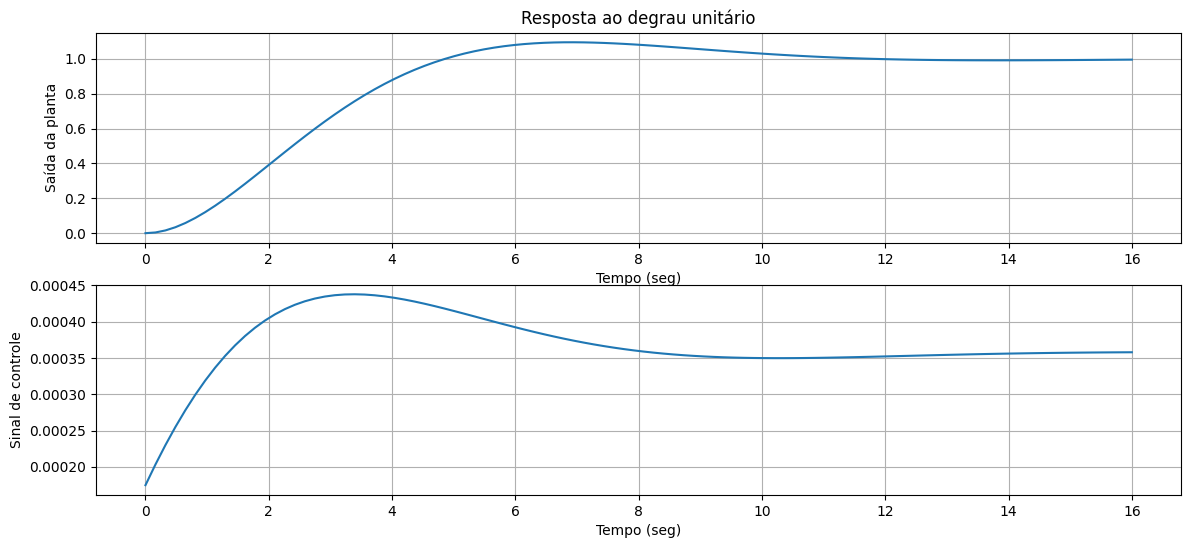

In [49]:
# Plotagem da resposta
import matplotlib.pyplot as plt
# Plotagem da saída
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(resp.t,resp.outputs)
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída da planta')
plt.title('Resposta ao degrau unitário')
plt.grid()
# Calcula e plota o sinal de controle
plt.subplot(212)
plt.plot(resp.t,u.T)
plt.xlabel('Tempo (seg)')
plt.ylabel('Sinal de controle')
plt.grid()

A resposta ao degrau unitário da saída da planta mostra como o sistema responde a uma entrada degrau, atingindo seu valor final de forma estável. O sinal de controle correspondente mostra a ação de controle aplicada para manter a saída do sistema em um valor desejado.

Essa análise é útil para avaliar o desempenho do sistema controlado e verificar se as especificações estabelecidas foram atendidas.